# Table of Contents

* [NLP Text Pre-Processing](#chapter1)
    * [Function](#section_1_1)
    * [Module](#section_1_2)
    * [Word Cloud](#section_1_3)
    * [Frequency Distributions](#section_1_4)

* [Native Bayes Classifier](#chapter2)
    * [EDA](#section_2_1)
    * [Text Preprocessing](#section_2_2)
    * [Feature Extraction](#section_2_3)
    * [Modelling](#section_2_4)
    * [Model Evaluation](#section_2_5)
    * [Tuning](#section_2_6)
    


# 1. NLP Text Pre-Processing<a class="anchor" id="chapter1"></a>
In this notebook, we will learn how to perform the following operations:
- punctuation removal
- case normalization
- stop word removal
- stemming
- lemmatization 

We will also combine all these steps together to create a text pre-processing pipeline.

In [21]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import gutenberg 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

In [3]:
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('gutenberg')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell5520\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Dell5520\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell5520\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Dell5520\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\gutenberg.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell5520\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
stopword_list = stopwords.words('english')
print(f'Stopwords:\n{stopword_list}')

Stopwords:
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so'

In [5]:
print(f'Number of words: {len(nltk.corpus.words.words())}')

Number of words: 236736


In [6]:
word_dict = set(word.lower() for word in nltk.corpus.words.words()) 
print(f'Number of words: {len(word_dict)}')

# removed some duplicates and made lower case

Number of words: 234377


In [7]:
# setting up our corpus

corpus = [
    'The history of natural language processing (NLP) generally started in the 1950s, although work can be found from earlier periods.The history of natural language processing (NLP) generally started in the 1950s, although work can be found from earlier periods.',
    'In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligenceIn 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.'
    'Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural language generation.Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural language generation.',
    'This is simply a simple sentence!!!',
    'The first document and the second document and the third document are documented online on Wikipedia! :)'
]
 
print(corpus)

['The history of natural language processing (NLP) generally started in the 1950s, although work can be found from earlier periods.The history of natural language processing (NLP) generally started in the 1950s, although work can be found from earlier periods.', 'In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligenceIn 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural language generation.Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural language generation.', 'This is simply a simple sentence!!!', 'The first document and the second document and the third document 

In [8]:
sample_doc = corpus[-1]
print(sample_doc)

The first document and the second document and the third document are documented online on Wikipedia! :)


In [16]:
# Case Normalisation
sample_doc = sample_doc.lower()
print(f'Case Normalisation:\n{sample_doc}\n')

# Punctuation Removal
sample_doc = re.sub(r'[^a-zA-Z0-9]', ' ', sample_doc)
print(f'Punctuation Removal:\n{sample_doc}\n')

# Tokenisation
sample_doc_tokenised = word_tokenize(sample_doc)
print(f'Tokenised words:\n{sample_doc_tokenised}\n')

# Filtering
sample_doc_tokenised = [
    word for word in sample_doc_tokenised if word not in stopword_list
]
print(f'Filtered words:\n{sample_doc_tokenised}\n')

# Stemming
stemmer = PorterStemmer()
sample_doc_stemmed = [stemmer.stem(word) for word in sample_doc_tokenised]
print(f'Stemmed words:\n{sample_doc_stemmed}\n')

# Lemmatisation
lemmatizer = WordNetLemmatizer()
sample_doc_lemmatised = [
    lemmatizer.lemmatize(word) for word in sample_doc_stemmed
]
print(f'Lemmatised words:\n{sample_doc_lemmatised}\n')

# reconstruct
machine_readable_string = ' '.join(sample_doc_lemmatised)
print(f'Machine Readable String:\n{machine_readable_string}\n')

Case Normalisation:
the first document and the second document and the third document are documented online on wikipedia    

Punctuation Removal:
the first document and the second document and the third document are documented online on wikipedia    

Tokenised words:
['the', 'first', 'document', 'and', 'the', 'second', 'document', 'and', 'the', 'third', 'document', 'are', 'documented', 'online', 'on', 'wikipedia']

Filtered words:
['first', 'document', 'second', 'document', 'third', 'document', 'documented', 'online', 'wikipedia']

Stemmed words:
['first', 'document', 'second', 'document', 'third', 'document', 'document', 'onlin', 'wikipedia']

Lemmatised words:
['first', 'document', 'second', 'document', 'third', 'document', 'document', 'onlin', 'wikipedia']

Machine Readable String:
first document second document third document document onlin wikipedia



## Function


In [17]:
def case_normalize(text):
    '''
    Takes in a text string and returns a string with all characters in lower case. 
    '''
    text = text.lower()
    
    return text
 
def remove_punctuation(text):
    '''
    Takes in a text string and returns a string with all the punctuation removed.
    '''
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    
    return text
 
def tokenize(text):
    '''
    Takes in a text string and returns a list where each item corresponds to a token.
    '''
    tokenized_text = word_tokenize(text)
    
    return tokenized_text
 
def remove_stopwords(tokenized_text):
    '''
    Takes in a list of text, and returns another list where the stop words have been removed.
    '''
    stopword_list = stopwords.words('english')
    processed_text = [word for word in tokenized_text if word not in stopword_list]
    
    return processed_text
 
def remove_unknown_words(tokenized_text):
    '''
    Takes in a list of text, and returns another list where unknown words have been removed.
    '''
    word_dict = set(word.lower() for word in nltk.corpus.words.words())
    processed_text = [word for word in tokenized_text if word in word_dict]
    
    return processed_text
 
def lemmatize(tokenized_text):
    '''
    Takes in a list of text, and returns another list where each word has been lemmatized.
    '''
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = [lemmatizer.lemmatize(word) for word in tokenized_text]
    
    return lemmatized_text
 
def process_text(text):
    '''
    Takes in a raw text document and performs the following steps in order:
    - punctuation removal
    - case normalization
    - tokenization
    - remove stopwords
    - lemmatization
 
    Then returns a string containing the processed text
    '''
    
    text = case_normalize(text)
    text = remove_punctuation(text)
    tokenized_text = tokenize(text)
    tokenized_text = remove_stopwords(tokenized_text)
    processed_text = lemmatize(tokenized_text)
    
    processed_text = ' '.join(processed_text)
    
    return processed_text


In [18]:
process_text(corpus[-1])

'first document second document third document documented online wikipedia'

In [19]:
process_text(corpus[-2])

'simply simple sentence'

## Module<a class="anchor" id="section_1_2"></a>

In [23]:
import sys
sys.path
import nlp_utils as nu
# the nlp_utils is in my path atm (in the notebooks folder)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell5520\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Dell5520\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell5520\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell5520\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Dell5520\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Word Cloud<a class="anchor" id="section_1_3"></a>

In [24]:
document = gutenberg.raw('whitman-leaves.txt')

In [25]:
print(document[:1000])

[Leaves of Grass by Walt Whitman 1855]


Come, said my soul,
Such verses for my Body let us write, (for we are one,)
That should I after return,
Or, long, long hence, in other spheres,
There to some group of mates the chants resuming,
(Tallying Earth's soil, trees, winds, tumultuous waves,)
Ever with pleas'd smile I may keep on,
Ever and ever yet the verses owning--as, first, I here and now
Signing for Soul and Body, set to them my name,

Walt Whitman



[BOOK I.  INSCRIPTIONS]

}  One's-Self I Sing

One's-self I sing, a simple separate person,
Yet utter the word Democratic, the word En-Masse.

Of physiology from top to toe I sing,
Not physiognomy alone nor brain alone is worthy for the Muse, I say
    the Form complete is worthier far,
The Female equally with the Male I sing.

Of Life immense in passion, pulse, and power,
Cheerful, for freest action form'd under the laws divine,
The Modern Man I sing.



}  As I Ponder'd in Silence

As I ponder'd in silence,
Returning upon my poems, c

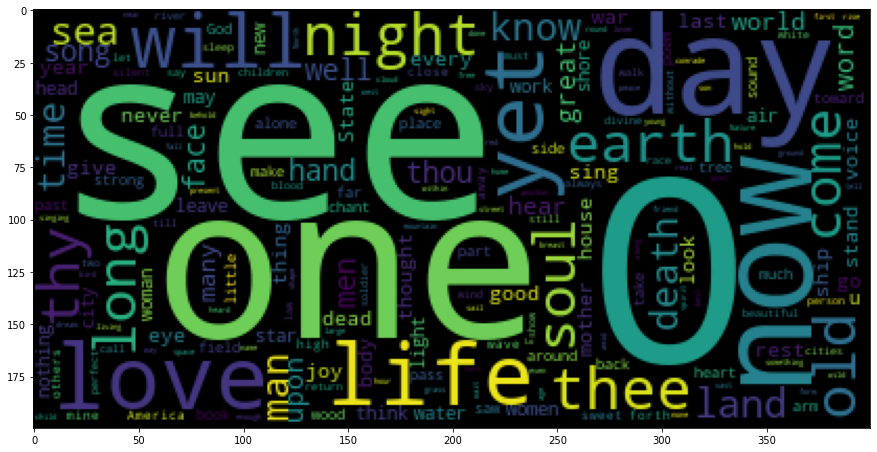

In [29]:
wc = WordCloud().generate(document)
fig, ax = plt.subplots(figsize=(15, 8))
ax.imshow(wc);

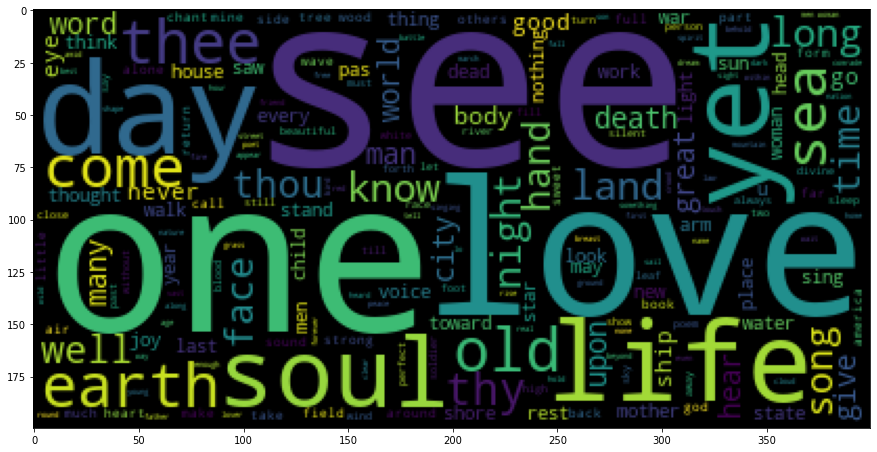

In [30]:
wc = WordCloud().generate(nu.process_text(document))
fig, ax = plt.subplots(figsize=(15, 8))
ax.imshow(wc);

## Frequency Distributions<a class="anchor" id="section_1_4"></a>

In [32]:
FreqDist(document) # does counts on a character level

FreqDist({' ': 121294, 'e': 66279, 't': 45259, 'o': 41263, 'a': 40474, 'n': 38006, 's': 37598, 'r': 33173, 'i': 32236, 'h': 31858, ...})

In [34]:
f_dist = FreqDist(word_tokenize(document)) # word counts
f_dist.most_common()[:20]

[(',', 17936),
 ('the', 8814),
 ('and', 4795),
 ('of', 4125),
 ('I', 2931),
 ('to', 1871),
 ('in', 1710),
 ('.', 1590),
 ("'d", 1534),
 ('you', 1337),
 ('The', 1298),
 ('!', 1227),
 ('with', 1111),
 ('a', 1089),
 ('is', 1071),
 ('me', 971),
 ('all', 921),
 ('my', 905),
 ('--', 902),
 ('or', 895)]

In [35]:
f_dist = FreqDist(word_tokenize(nu.process_text(document)))
f_dist.most_common()[:20]

[('see', 440),
 ('one', 379),
 ('day', 334),
 ('life', 290),
 ('love', 288),
 ('old', 280),
 ('soul', 270),
 ('shall', 263),
 ('yet', 262),
 ('thee', 261),
 ('long', 253),
 ('earth', 246),
 ('man', 243),
 ('night', 240),
 ('thy', 226),
 ('come', 224),
 ('sea', 223),
 ('land', 213),
 ('thou', 209),
 ('time', 204)]

In [36]:
pd.Series(word_tokenize(nu.process_text(document))).value_counts()[:20]

see      440
one      379
day      334
life     290
love     288
old      280
soul     270
shall    263
yet      262
thee     261
long     253
earth    246
man      243
night    240
thy      226
come     224
sea      223
land     213
thou     209
time     204
dtype: int64

# 2. Naive bayes classifier<a class="anchor" id="chapter2"></a>

We build a classifier for newsgroup posts

In [2]:
import nlp_utils as nu
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import os

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell5520\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Dell5520\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell5520\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell5520\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Dell5520\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [4]:
%%time

download_dir = os.path.join(os.path.abspath('.'), 'data', 'nlp', 'downloads')
data_train = fetch_20newsgroups(data_home = download_dir, subset='train')
data_test = fetch_20newsgroups(data_home = download_dir, subset='test')

CPU times: total: 45.6 s
Wall time: 3min 58s


## EDA<a class="anchor" id="section_2_1"></a>

In [5]:
data_train['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
data_train['data'][0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

## Text Preprocessing<a class="anchor" id="section_2_2"></a>

- make lowercase, 
- remove punctuation
- remove stopwords
- lemmatize

In [8]:
%%time

process_train = [nu.process_text(i) for i in data_train['data']]
process_test = [nu.process_text(i) for i in data_test['data']]

CPU times: total: 1min 26s
Wall time: 1min 30s


## Feature Extraction<a class="anchor" id="section_2_3"></a>

In [9]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(process_train)
X_test = vectorizer.transform(process_test) 

# dont fit on the test we want the same transform as the train

In [10]:
y_train = data_train['target']
y_test = data_test['target']

print(f'Object type:\n{type(X_train)}')
print(f'Shape:\t{X_train.shape}')

Object type:
<class 'scipy.sparse._csr.csr_matrix'>
Shape:	(11314, 120164)


## Modelling<a class="anchor" id="section_2_4"></a>

In [12]:
model = MultinomialNB()
model.fit(X_train, y_train)

acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = accuracy_score(y_test, model.predict(X_test)) 

print(f'Train accuracy:\t', acc_train)
print(f'Test accuracy:\t', acc_test)
# we are predicting which class of document we think from it's content

Train accuracy:	 0.9396323139473219
Test accuracy:	 0.8009824747742963


## Model Evaluation<a class="anchor" id="section_2_5"></a>

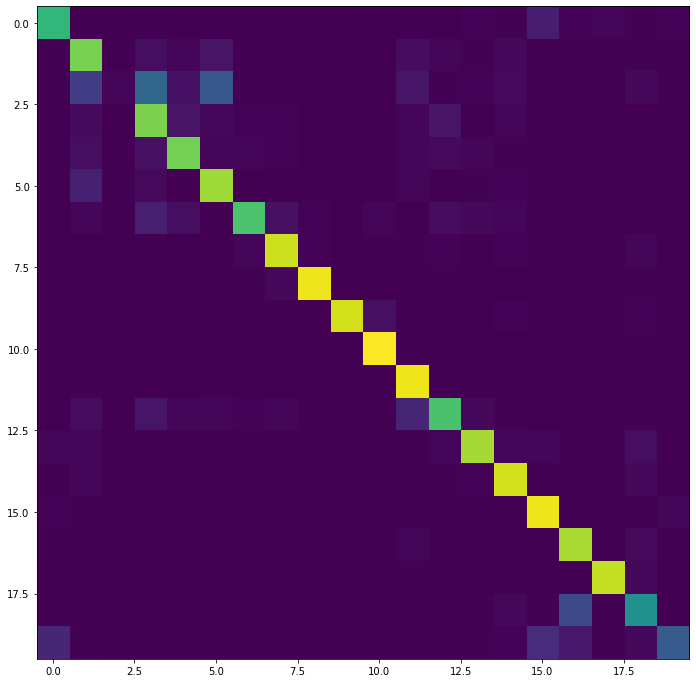

In [14]:
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(confusion_matrix(y_test, model.predict(X_test)));

In [15]:
list(zip(data_test['target_names'], model.predict_proba(X_test)[0]))

[('alt.atheism', 3.2071611947858e-20),
 ('comp.graphics', 6.769398302487096e-13),
 ('comp.os.ms-windows.misc', 2.794896365321751e-34),
 ('comp.sys.ibm.pc.hardware', 1.5402579800907332e-12),
 ('comp.sys.mac.hardware', 5.1781405349590446e-17),
 ('comp.windows.x', 2.3964627295802737e-15),
 ('misc.forsale', 1.7899395856812694e-20),
 ('rec.autos', 0.9999999714060555),
 ('rec.motorcycles', 3.7382224192978613e-13),
 ('rec.sport.baseball', 7.844535347872612e-13),
 ('rec.sport.hockey', 1.4015973924376344e-09),
 ('sci.crypt', 7.237747402073542e-22),
 ('sci.electronics', 2.7009309149474097e-08),
 ('sci.med', 3.9321938648347456e-13),
 ('sci.space', 1.7930832965570825e-10),
 ('soc.religion.christian', 1.4548359194262018e-25),
 ('talk.politics.guns', 6.911964730464921e-16),
 ('talk.politics.mideast', 1.8016691339025574e-22),
 ('talk.politics.misc', 9.479205757556999e-17),
 ('talk.religion.misc', 6.943734676964389e-15)]

## Tuning<a class="anchor" id="section_2_6"></a>

In [18]:
vectorizer2 = CountVectorizer(ngram_range=(1,2)) 
# look at bigrams - will increase number of columns a lot

model = MultinomialNB(alpha=0.5)
model.fit(X_train, y_train)
# can change prior on the naive bayes model
# can try regularised logistic or a neural net

acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = accuracy_score(y_test, model.predict(X_test)) 

print(f'Train accuracy:\t', acc_train)
print(f'Test accuracy:\t', acc_test)

Train accuracy:	 0.9455541806611278
Test accuracy:	 0.8062931492299522
